LAB :06

" Noise Reduction "

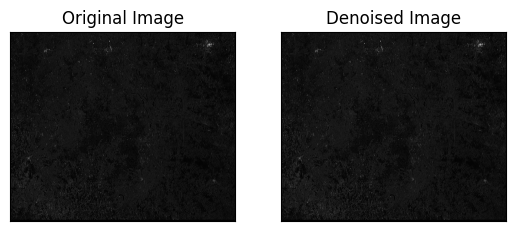

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [3]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

"COLOR MAPPING"

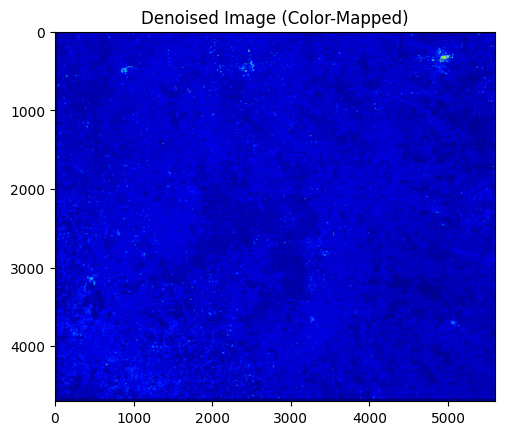

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

" MEAN SQUARED ERROR "

In [5]:

import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread('/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 8.98671759118541


"
STRUCTURAL SIMILARITY INDEX (SSIM) "

In [7]:
!pip install scikit-image

In [8]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread('/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9109025703996598


"
READING SPECIFIC PIXEL VALUE "

In [9]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r'/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 16
Denoised pixel value at (150, 150): 19


"PRINT ALL VALUES(MAY HANG SYSTEM)"

" FOURIER TRANSFORM "

Original Image Amplitude (Magnitude):
[[ 211.         5317.39529233 7852.50259399 ... 5464.21219353
  7852.50259399 5317.39529233]
 [8279.95819815 3412.8173951  3816.98690147 ... 2764.05503061
  1045.91725191 2553.86720838]
 [5967.4375386  1396.58753118 1576.36839557 ... 4319.65422768
  4799.56282115 4065.59809708]
 ...
 [1046.08554668 1296.76399236 3485.00243162 ...  218.03694303
   424.98869968 6499.37557715]
 [5967.4375386  4065.59809708 4799.56282115 ... 2387.20073102
  1576.36839557 1396.58753118]
 [8279.95819815 2553.86720838 1045.91725191 ... 3838.6168882
  3816.98690147 3412.8173951 ]]
Denoised Image Amplitude (Magnitude):
[[1536.          431.84746877 1255.49595133 ... 1183.94091018
  1255.49595133  431.84746877]
 [1652.835128    486.11864324 3060.70290686 ... 1644.5328726
  1238.3170491   185.51431193]
 [ 645.85532068  484.80940123 1254.06093535 ...  655.98181515
  2810.08409717 1335.75668177]
 ...
 [ 623.24251104  446.49754326 1042.76593797 ...  912.12924808
   155.88119738 

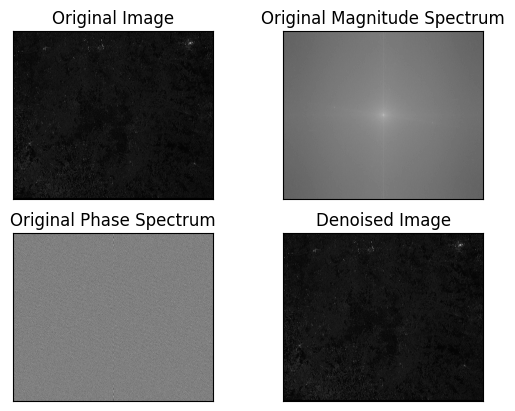

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r'/content/drive/MyDrive/DIP_CITY_DATA /HH-ALPSRP247640490-H2.2_UA.tif', 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
